<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Joaquín Cisternas
- Nombre de alumno 2: Diego González


### **Link de repositorio de GitHub:** `https://github.com/jcist/MDS7202`


## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta Aquí

El análisis univariado es el uso de diversas técnicas gráficas y estadísticas para estudiar las características de una variable, por otra parte el análisis multivariado toma dos o más variables para su estudio en conjunto, buscando identificar relaciones entre ellas. Dentro de los beneficios de estudiar estos datos, se encuentra la identificación de las variables más relevantes y comprender la naturaleza de la relación entre ellas y la variable objetivo. 

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [4]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )
    
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [5]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203820 bytes
dtype: object

Análisis de la primera serie:

Del gráfico se puede desprender que la distribución de los valores de los productos se ve distorsionada por los outliers, pues existen productos con valores superiores a los $1200. Una vez que se limpiean los outliers, se ve que la mediana de precios se encuentra en 2.1, donde la distribución se encuentra agrupada mayotitariamente entre la mediana y el tercer cuartil. Es posible ver mas outliers que siguen distorsionando la distribuición del grueso de los datos. 

In [6]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

Análisis de la segunda serie

Es posible apreciar que existen cantidades negativas, lo cual no tiene sentido interpretativo considerando el contexto. Es posible que correspondan a datos incrorrectos y que sea necesario limpiar los valores.

In [7]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203820 bytes
dtype: object

Análisis de la tercera serie

Con respecto a las fechas, no es posible concluir nada de forma concisa, salvo decir que en los últimos meses de la muestra la cantidad de ventas ha aumentado.

In [8]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203820 bytes
dtype: object

Análisis de la cuarta serie

Con respecto a los países en los que se vende, la gran mayoría corresponde al Reino Unido.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [9]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

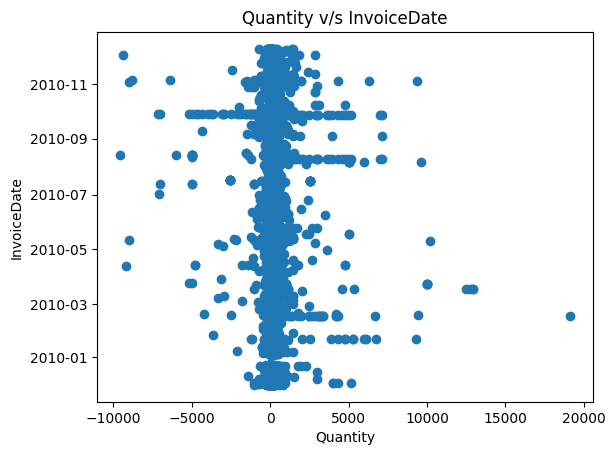

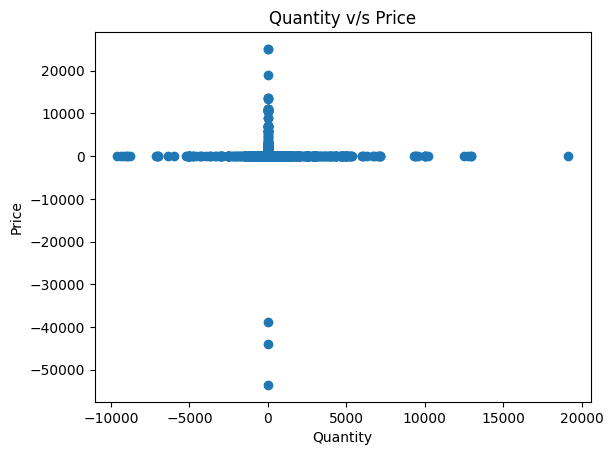

In [10]:
profile_df(df_retail)

La función muestra scatterplots de las variables numéricas y fechas del dataframe, los cuales no tienen una visualización muy intuitiva. Sin embargo, se puede apreciar poca relación entre la fecha de la factura y la cantidad de productos vendidos, en especial porque existen valores negativos, al igual que en la gráfica de cantidad vs precio. Luego se puede ver un análisis de correlaciones con las únicas dos variables numéricas del dataframe, donde se ve que la correlación entre el precio y la cantidad vendida es negativa pero en un orden de magnitud muy bajo. Finalmente en la missing matrix se puede ver que los únicos datos faltantes son aquellos referentes al customer ID, los cuales no son verdaderamente útiles para el análisis.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [ ]:
def limpieza_df(dataframe):
    # Filtrar filas con datos vacíos
    df_filtrado = dataframe.dropna().copy()
    
    # Modificar la columna 'Quantity' en el DataFrame filtrado usando .loc
    df_filtrado.loc[:, 'Quantity'] = np.abs(df_filtrado['Quantity'])
    
    # Reiniciar los índices
    df_reset = df_filtrado.reset_index(drop=True)
    
    return df_reset

df_retail_2 = limpieza_df(df_retail)

In [ ]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203820 bytes
dtype: object

In [ ]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203820 bytes
dtype: object

In [ ]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203820 bytes
dtype: object

In [ ]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203820 bytes
dtype: object

Con respecto al análisis univariado, es posible notar que no existe mucha diferencia salvo la eliminación de datos infactibles, por lo que el análisis se mantiene.

## Bivariant Analysis:

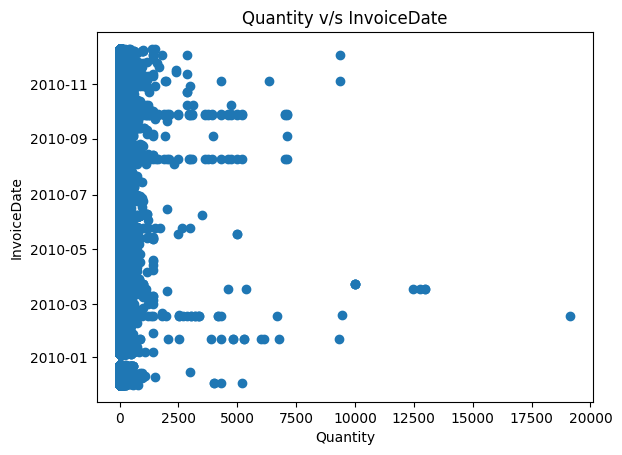

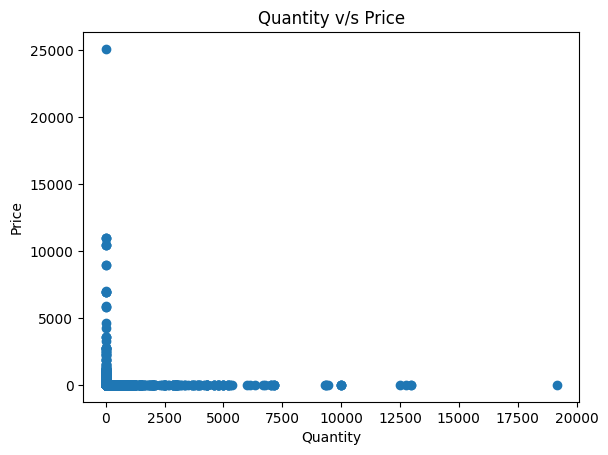

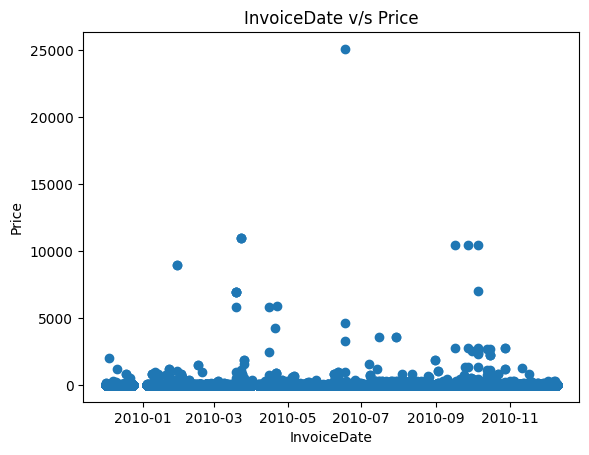

## Correlation:

C:\Users\joaci\AppData\Local\Temp\ipykernel_10788\2390459975.py:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

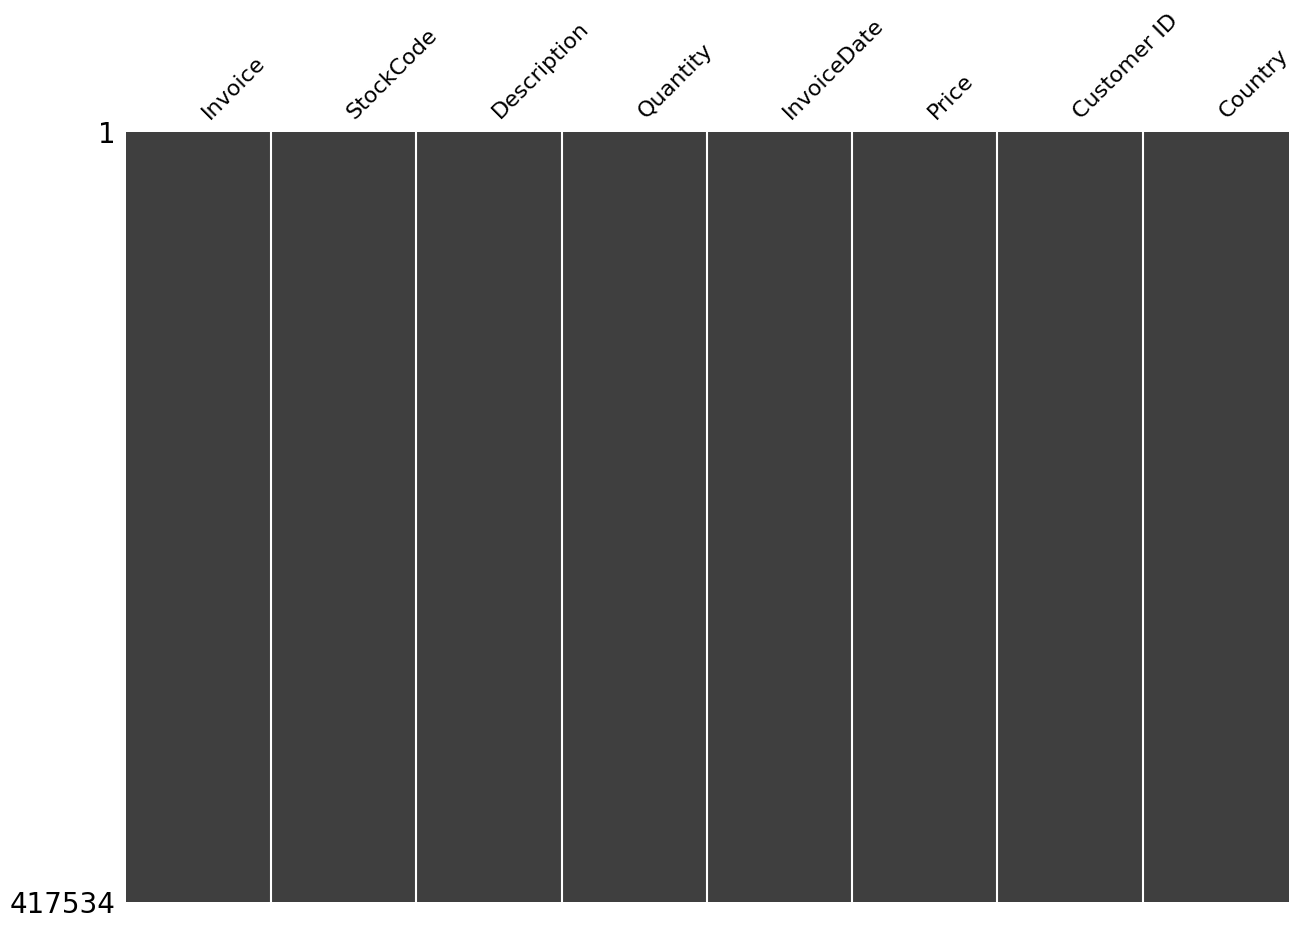

In [ ]:
profile_df(df_retail_2)

Ahora los datos tienen un sentido interpretativo mas coherente, sin embargo la visualización sigue siendo difícil de ver. En el primer gráfico se ve que no hay mucha relación entre la fecha y la cantidad comprada, salvo en las últimas fechas donde aumenta un poco. Con respecto a la cantidad, esta aumenta al dismunuir su precio, cosa que se confirma en la matriz de correlación, en dónde el coeficiente aumenta en comparación a los datos sin limpiar, sin embargo sigue siendo un valor muy bajo. La fecha de factura tampoco tiene que ver demasiado con el precio de venta, pues se mantienen sus niveles a lo largo del periodo observado. Finalmente la missing matrix ya no tiene valores nulos.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [ ]:
# top 30 productos que generan más ganancias

df_retail_2['TotalPrice'] = df_retail_2['Quantity'] * df_retail_2['Price']
df_retail_2.head()

# grafico de barras de los 30 productos que generan más ganancias en plotly

top_30 = df_retail_2.groupby('Description').sum().sort_values(by='TotalPrice', ascending=False).head(30)
fig = px.bar(top_30, x=top_30.index, y='TotalPrice', title='Top 30 productos que generan más ganancias')
fig.show()

# top 30 productos mas vendidos

top_30 = df_retail_2.groupby('Description').sum().sort_values(by='Quantity', ascending=False).head(30)
fig = px.bar(top_30, x=top_30.index, y='Quantity', title='Top 30 productos mas vendidos')
fig.show()


C:\Users\joaci\AppData\Local\Temp\ipykernel_10788\3282751743.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



C:\Users\joaci\AppData\Local\Temp\ipykernel_10788\3282751743.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Es posible apreciar que el producto más vendido no es el que generan mayores ganancias, sin embargo hay algunos de ellos que, debido a la gran cantidad vendida, se encuentran entre los que más ganancias entregan, como por ejemplo 'WHITE HANGING HEART T-LIGHT HOLDER' que es el tercero que genera más ingresos. El producto 'Manual', que es el que más utilidades genera, pareciera ser un producto que se ingresa al sistema de manera manual, pues su precio cambia dependiendo de la fila y su cantidad siempre es una unidad. 

In [ ]:
# mostrar resultados del producto 'manual'

df_retail_2[df_retail_2['Description'] == 'Manual'].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
2154,C489651,M,Manual,1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom,5.10
6779,C490126,M,Manual,1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom,5.95
6827,C490129,M,Manual,1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom,1998.49
8263,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.0,United Kingdom,0.85
8264,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.0,United Kingdom,0.21


Finalmente, los productos que se encuentran tanto en el top 30 más vendidos como en el top 30 que más utilidades generan son los siguientes:

In [ ]:
# inner join entre los productos mas vendidos y los que generan mas ganancias

top_30 = df_retail_2.groupby('Description').sum(numeric_only=True).sort_values(by='Quantity', ascending=False).head(30)
top_30_2 = df_retail_2.groupby('Description').sum(numeric_only=True).sort_values(by='TotalPrice', ascending=False).head(30)
top_30.merge(top_30_2, how='inner', on='Description')



,Quantity_x,Price_x,TotalPrice_x,Quantity_y,Price_y,TotalPrice_y
Description,,,,,,
WHITE HANGING HEART T-LIGHT HOLDER,57969,9258.14,154371.96,57969,9258.14,154371.96
ASSORTED COLOUR BIRD ORNAMENT,44982,2300.16,71132.70,44982,2300.16,71132.70
ROTATING SILVER ANGELS T-LIGHT HLDR,30954,657.99,40471.20,30954,657.99,40471.20
JUMBO BAG RED RETROSPOT,29658,2123.70,51910.20,29658,2123.70,51910.20
STRAWBERRY CERAMIC TRINKET BOX,25963,1892.64,30441.84,25963,1892.64,30441.84
JUMBO BAG STRAWBERRY,19324,1733.85,34021.20,19324,1733.85,34021.20
LUNCH BAG RED SPOTTY,17649,1811.94,27534.65,17649,1811.94,27534.65


### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    df = dataframe.copy()
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['InvoiceDate'] = df['InvoiceDate'].dt.date
    df['TotalPrice'] = df['Quantity'] * df['Price']
    df = df.groupby('InvoiceDate').sum()
    df = df.reset_index()
    fig = px.line(df, x='InvoiceDate', y='TotalPrice', title='Ventas por día')
    fig.show()

plot_ventas(df_retail_2)

C:\Users\joaci\AppData\Local\Temp\ipykernel_10788\168114653.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Del gráfico se puede observar que hay una alta variabilidad de las ventas en el tiempo. Se puede observa una leve tendencia al alta en los ingresos, tal como se indicó anteriormente en el análisis. Es posible apreciar distintos peaks de ventas durante varias fechas, destacando particularmente el peak el 27 de septiembre de 2010, generando 120k en ingresos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>